<a href="https://colab.research.google.com/github/piaoyanxiu/vocab-collocation/blob/main/%EC%9C%B5%EC%86%8C%ED%94%84%ED%94%8C%EC%A0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

import re

import  matplotlib
import  matplotlib.font_manager  as fm
import  matplotlib.pyplot  as plt

import nltk

from nltk import word_tokenize, bigrams
from nltk.probability import ConditionalFreqDist
from nltk.util import ngrams


from collections import Counter

font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"

font_name  = fm.FontProperties(fname=font_path, size=12).get_name( )

plt.rc("font", family= font_name)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
file_directory="/content/gdrive/My Drive/Colab Notebooks/TXTData/모의고사 합본 텍파.txt"

with open(file_directory, 'r', encoding='cp949') as file:
    text_data = file.read()

In [4]:
engl_text=re.sub("[^a-zA-Z.,:!?;’①②③④⑤ ]",'',text_data.lower())

result = re.split(r'[.,!?:;①②③④⑤]+', engl_text)

new_list = [element for element in result if element.strip() != ""]


In [5]:
search=input('찾을 단어 입력: ')

ssearch=' '+search+' '

def filter(word, lst):
  search_lst=[]
  for sentence in lst:
    if word in sentence:
      search_lst.append(sentence)
  return search_lst

search_result=filter(ssearch, new_list)

찾을 단어 입력: play


In [6]:
def tokenizer(text):
  words=[]
  for sentence in text:
    words.append(sentence.split())
  return words

tokens=tokenizer(search_result)

In [7]:
def bigramfun(token_lst):
  bigram_ad=[]

  for token in token_lst:
    bigram_ad.append(bigrams(token))

  bigram_token = []

  for i in range(len(search_result)):
    bigram_list = [x for x in bigram_ad[i]]
    bigram_token.extend(bigram_list)

  return filter(search, bigram_token)

final_bigram=bigramfun(tokens)

In [8]:
back=[]
front=[]

for i in range(len(final_bigram)):
  if final_bigram[i][0]==search:
    back.append(final_bigram[i][1])
  else:
    front.append(final_bigram[i][0])

In [9]:
front_counter = Counter(front)

common_front=front_counter.most_common(10)

final_front=[]
front_weight=[]
for i in range(len(common_front)):
  final_front.append(common_front[i][0])
  front_weight.append(int(common_front[i][1])*100+500)

print(final_front)


back_counter = Counter(back)

common_back=back_counter.most_common(10)

final_back=[]
back_weight=[]
for i in range(len(common_back)):
  final_back.append(common_back[i][0])
  back_weight.append(int(common_back[i][1])*100+500)

print(final_back)

['to', 'can', 'teachers', 'and', 'in', 'who', 'could', 'can’t', 'between', 'of']
['a', 'an', 'the', 'in', 'with', 'and', 'golf', 'is', 'of', 'for']


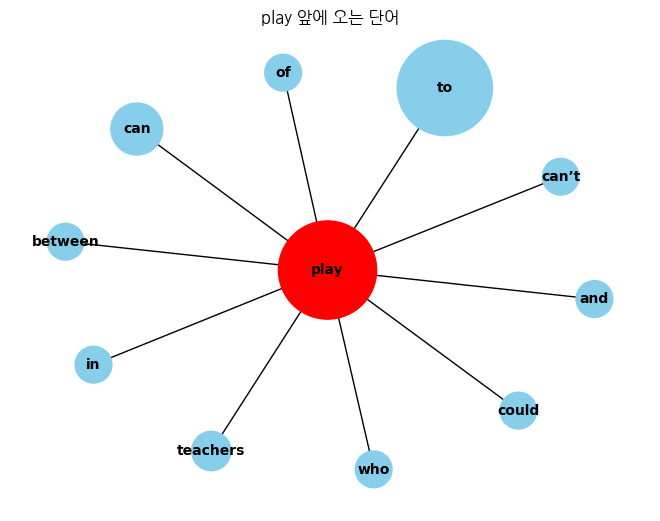

play 활용 문장 예시:

1.  and instrument play is a gift to all who work for the wellbalanced development of young children into the responsible citizens they will one day become
2.  only the researcher who is competent in the  art  of  written  communication can play an active  and  effective  role  in  contributing to science
3.  teachers play a critical role in developing environments 
4.  those who work hard and play by the rules will earn the rewards they deserve
5. consider two athletes who both want to play in college
6.  who invited him to play their music
7.  international law could play a minimal role or none at all
8.  i can’t play a musical instrument
9.  children can move effortlessly between play and absorption in a story
10.   we would know’ this from the evidence that on a daily basis there is a significant amount of cultural’ activity all focused on football in terms of the amount of people who play it





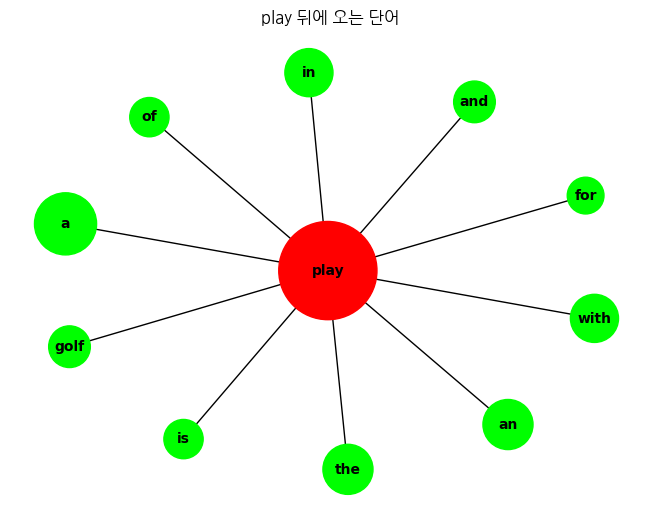

play 활용 문장 예시:

1.  it seems likely that some other factor must have been in play 
2.   colors play an important role in this
3.  shaky fingers in the right location and  began to play chopsticks
4.  carl seashore discovered that musicians only rarely play two equal notes in exactly the same way
5.  and the musical understanding necessary to play an instrument can all be established without instruments
6.  it’ll be great to play in your band
7.  that’s why he took me to play golf today
8. probably the biggest roadblock to play for adults is the worry that they will look silly
9.  continued engagement in altered forms of play after childhood
10.  we found that teams’ wonlost records had nothing to do withhow much young athletes liked their coaches or with their desire to play for the same coaches again


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.Graph()
G1.add_nodes_from(final_front)   # 앞에 오는 단어 노드 추가
G1.add_edges_from([(elem, search) for elem in final_front])   # 검색한 단어와 결과로 나온 단어들의 간선 생성

center_node = search  # 중심 노드는 검색한 단어

subgraph_nodes = [center_node] + list(G1.neighbors(center_node))
subgraph = G1.subgraph(subgraph_nodes)    # 서브그래프 생성

node_colors = ['red' if node == center_node else 'skyblue' for node in subgraph.nodes()]    # 중심 노드를 빨간색, 나머지 노드를 파란색으로 지정

nx.draw(subgraph, with_labels=True, font_weight='bold', node_color=node_colors, node_size=front_weight+[5000], font_size=10)

plt.title(search+' 앞에 오는 단어')
plt.show()

print(search+' 활용 문장 예시:\n')
printed_ssf=[]
n=1
for word in final_front:
  for ss in search_result:
    if word in ss:
      if ss not in printed_ssf:
        print(str(n)+'. '+ss)
        printed_ssf.append(ss)
        n+=1
        break

print('\n\n')




G2 = nx.Graph()

G2.add_nodes_from(final_back)

G2.add_edges_from([(elem, search) for elem in final_back])

subgraph_nodes = [center_node] + list(G2.neighbors(center_node))

subgraph = G2.subgraph(subgraph_nodes)

node_colors = ['red' if node == center_node else 'lime' for node in subgraph.nodes()]

nx.draw(subgraph, with_labels=True, font_weight='bold', node_color=node_colors, node_size=back_weight+[5000], font_size=10)

plt.title(search+' 뒤에 오는 단어')
plt.show()

print(search+' 활용 문장 예시:\n')
printed_ssb=[]
n=1
for word in final_back:
  for ss in search_result:
    if word in ss:
      if ss not in printed_ssb and ss not in printed_ssf:
        print(str(n)+'. '+ss)
        printed_ssb.append(ss)
        n+=1
        break


